In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from src.variablesName import VariablesName
import src.pathconfig as pathcfg

vNames = VariablesName()

In [2]:
import pandas as pd
import numpy as np

# set seed for reproducibility
np.random.seed(0) 

In [3]:
folderpath = pathcfg.folderpath
filepath = f"{folderpath}/2017-2018_NSCH_DRC.csv.gzip"

In [4]:
df = pd.read_csv(filepath, index_col='HHID', compression='gzip')
have_autism = df[['K2Q35B']].fillna(2)
df = df[[col for col in df.columns.values if col != 'K2Q35B']]

In [5]:
from scipy.stats import spearmanr
cor_col = []
p_value_col = []
for col in df.columns.values:
    cor, p_value = spearmanr(df[col].values, have_autism.values, nan_policy='omit')
    cor_col.append(cor)
    p_value_col.append(cor)
#     print(f"{col} - spearman: {cor} - p-value: {p_value}")

df_spearman_corr = pd.DataFrame({'spearman': cor_col,
                                 'p_value': p_value_col},
                                 index=df.columns.values)
df_spearman_corr = df_spearman_corr.sort_values(by=['spearman'], ascending=False)

df_spearman_corr.reset_index(inplace=True)
df_spearman_corr['description'] = df_spearman_corr['index'].apply(lambda x: vNames.descriptionOfColumn(x))
df_spearman_corr.set_index('index', inplace=True)

In [ ]:
df_spearman_corr

In [6]:
description_itens_list = ['screener', 'asd', 'autism', 'sc ', 'cshcn', 'indicator'] 
autism_related_columns = [col for col in vNames.allColumns() if any(c in vNames.descriptionOfColumn(col).lower() for c in description_itens_list)]
print(autism_related_columns)

['K2Q35A_1_YEARS', 'K2Q35A', 'K2Q35B', 'AUTISMMED', 'AUTISMTREAT', 'K2Q35C', 'K2Q35D', 'SC_K2Q10', 'SC_K2Q11', 'SC_K2Q12', 'SC_K2Q13', 'SC_K2Q14', 'SC_K2Q15', 'SC_K2Q16', 'SC_K2Q17', 'SC_K2Q18', 'SC_K2Q19', 'SC_K2Q20', 'SC_K2Q21', 'SC_K2Q22', 'SC_K2Q23', 'ChHlthSt_1718', 'TeethCond_1718', 'OralProb_1718', 'BrstEver_1718', 'ExBrstFd_1718', 'BMI4_1718', 'BMI3_1718', 'PhysAct_1718', 'WgtConcn_1718', 'LowBWght_1718', 'VeryLBWght_1718', 'BornPre_1718', 'autism_1718', 'Cond2more27_1718', 'AutismSev_1718', 'Diff2more_1718', 'rxmeds_1718', 'serve_1718', 'func_1718', 'therapy_1718', 'mhealth_1718', 'qualnum_1718', 'CSHCN_1718', 'CSHCNtype_1718', 'mhneeds_1718', 'qualnum4_1718', 'DailyAct_1718', 'MakeFriend_1718', 'ADHDind_1718', 'ADHDSevInd_1718', 'ADHDMed_1718', 'ADHDBehTreat_1718', 'AutismInd_1718', 'ASDSevInd_1718', 'ASDMed_1718', 'ASDBehTreat_1718', 'ASDAge_1718', 'ASDDrType_1718', 'MedEmotion_1718', 'MEDB10ScrQ5_1718', 'CurrIns_1718', 'InsGap_1718', 'InsType_1718', 'InsAdeq_1718', 'insuran

In [7]:
for col in autism_related_columns:
    print(f"{col}   {vNames.descriptionOfColumn(col)}")

K2Q35A_1_YEARS   Autism ASD - First Told Age in Years
K2Q35A   Autism ASD
K2Q35B   Autism ASD Currently
AUTISMMED   Autism ASD - Medication Currently
AUTISMTREAT   Autism ASD - Behavioral Treatment
K2Q35C   Autism ASD Severity Description
K2Q35D   Autism ASD - First Told Doctor Type
SC_K2Q10   SC Needs or Uses Medication Currently
SC_K2Q11   SC Medication Used or Needed for Health Condition
SC_K2Q12   SC Medication Currently for 12 Months
SC_K2Q13   SC Needs or Uses More Medical Care than Others
SC_K2Q14   SC Medical Care Used or Needed for Health Condition
SC_K2Q15   SC Medical Care Currently for 12 Months
SC_K2Q16   SC Limited Ability
SC_K2Q17   SC Limited Ability from Health Condition
SC_K2Q18   SC Limited Ability from Health Condition for 12 Months
SC_K2Q19   SC Special Therapy
SC_K2Q20   SC Special Therapy for Health Condition
SC_K2Q21   SC Special Therapy for Health Condition for 12 Months
SC_K2Q22   SC Needs Treatment for Emotion Develop Behave
SC_K2Q23   SC Treatment for Chroni

In [8]:
df = df[[col for col in df.columns if col not in autism_related_columns]]

In [9]:
filter_func = lambda x, lim: x>lim or x<-lim

selected_columns = (df_spearman_corr[df_spearman_corr.spearman.apply(lambda x: filter_func(x, 0.1))].index.values.tolist())

model_columns = [col for col in selected_columns if col in df.columns]
df_to_model = df[model_columns]
df_to_model.head()

,K2Q36A,DiffErrand_1718,ERRANDALONE,K6Q15,ANYOTHER,MEMORYCOND,DiffMem_1718,K2Q30A,K4Q36,LearnThings_1718,...,BehavSev_1718,SpeechSev_1718,MAKEFRIEND,MakeFr3to5_1718,learning_1718,LearnSev_1718,OthrMent_1718,OthMHSev_1718,DevDelay_1718,DevDelSev_1718
HHID,,,,,,,,,,,,,,,,,,,,,
17000010,2.0,NaN,NaN,2.0,2.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17000013,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
17000025,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
17000031,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
17000034,2.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
y = have_autism.values
X = df_to_model.fillna(999).values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [12]:
# All trained models
clf_models = {}

## Models

**Feature selection**: Random Forest Classifier

**Classification algorithm**: Support Vector Machine

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

clf = Pipeline([
  ('feature_selection', SelectFromModel(RandomForestClassifier(max_depth=3, random_state=0),
                                        threshold="0.667*median", max_features=25)),
  ('classification', svm.SVC(random_state=0))
])
clf.fit(X_train, y_train)

clf_models[('RandomForestClassifier', 'SVC')] = clf
print(classification_report(y_test, clf.predict(X_test)))

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.65      0.24      0.35       404
         2.0       0.98      1.00      0.99     15235

    accuracy                           0.98     15639
   macro avg       0.82      0.62      0.67     15639
weighted avg       0.97      0.98      0.97     15639



In [14]:
columns_of_model = [y for x, y in zip(clf['feature_selection'].get_support(), model_columns) if x]
for col in columns_of_model:
    print(f"{col}   {vNames.descriptionOfColumn(col)}")

K2Q36A   Developmental Delay
ERRANDALONE   Difficulty Doing Errands Alone
K6Q15   Special Education Plan
ANYOTHER   Any Other Condition
DiffMem_1718   Children who have serious difficulty concentrating, remembering, or making decisions because of a physical, mental, or emotional condition, age 6-17 years
K2Q30A   Learning Disability
K4Q36   Received Special Services
CSHCNComplex_1718   Complexity of health care needs
K2Q34A   Behavior Problems
K4Q38   Received Special Services - Currently
K2Q36B   Developmental Delay Currently
K2Q37B   Speech Disorder Currently
SESCURRSVC   Special Education Plan - Currently
K2Q34B   Behavior Problems Currently
ANYOTHER_CURR   Any Other Condition Currently
SESPLANYR   Special Education Plan - Age in Years
K2Q34C   Behavior Problems Severity Description
K2Q36C   Developmental Delay Severity Description
DiffCare_1718   Parent felt child is much harder to care for than most children during the past month
K2Q30C   Learning Disability Severity Description
K

**Feature selection**: Decision Tree Classifier

**Classification algorithm**: Support Vector Machine

In [15]:
from sklearn.tree import DecisionTreeClassifier


clf = Pipeline([
  ('feature_selection', SelectFromModel(DecisionTreeClassifier(),
                                        threshold="0.667*median", max_features=25)),
  ('classification', svm.SVC(random_state=0))
])
clf.fit(X_train, y_train)

clf_models[('DecisionTreeClassifier', 'SVC')] = clf
print(classification_report(y_test, clf.predict(X_test)))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       404
         2.0       0.97      1.00      0.99     15235

    accuracy                           0.97     15639
   macro avg       0.49      0.50      0.49     15639
weighted avg       0.95      0.97      0.96     15639



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
columns_of_model = [y for x, y in zip(clf_models[('DecisionTreeClassifier', 'SVC')]['feature_selection'].get_support(), model_columns) if x]
for col in columns_of_model:
    print(f"{col}   {vNames.descriptionOfColumn(col)}")

ERRANDALONE   Difficulty Doing Errands Alone
ANYOTHER   Any Other Condition
DiffDress_1718   Children who have difficulty dressing or bathing, age 6-17 years
CSHCNComplex_1718   Complexity of health care needs
K4Q38   Received Special Services - Currently
ARRANGEHC   Hours Spent Arranging Health Medical Care
EMOSUPADV   Emotional Support - Health Condition Support Group
SESPLANYR   Special Education Plan - Age in Years
DiscussOpt_1718   Doctors discussed range of health care/treatment options
K2Q34C   Behavior Problems Severity Description
K2Q01   General Health
K6Q71_R   Show Interest and Curiosity
C4Q04   Frustrated In Efforts to Get Service
K8Q21   Share Ideas or Talk About Things That Matter
K7Q04R_R   Times School Contacted Household About Problems
K7Q85_R   Stays Calm and In Control When Challenged
cntdiff   Number of functional difficulties reported from list of 12 different difficulties asked in the survey
ADHDSev_1718   Parent-rated severity of child's current ADD/ADHD, age 3-

**Feature selection**: Decision Tree Classifier

**Classification algorithm**: Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
  ('feature_selection', SelectFromModel(DecisionTreeClassifier(), threshold=0.005)),
  ('classification', LogisticRegression())
])
clf.fit(X_train, y_train)

clf_models[('DecisionTreeClassifier', 'LogisticRegression')] = clf
print(classification_report(y_test, clf.predict(X_test)))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.64      0.23      0.33       404
         2.0       0.98      1.00      0.99     15235

    accuracy                           0.98     15639
   macro avg       0.81      0.61      0.66     15639
weighted avg       0.97      0.98      0.97     15639



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
  ('feature_selection', SelectFromModel(DecisionTreeClassifier(), threshold=0.005, max_features=25)),
  ('classification', LogisticRegression())
])
clf.fit(X_train, y_train)

clf_models[('DecisionTreeClassifier', 'LogisticRegression')] = clf

print(classification_report(y_test, clf.predict(X_test)))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.43      0.35      0.38       404
         2.0       0.98      0.99      0.99     15235

    accuracy                           0.97     15639
   macro avg       0.71      0.67      0.68     15639
weighted avg       0.97      0.97      0.97     15639



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<IPython.core.display.Javascript object>


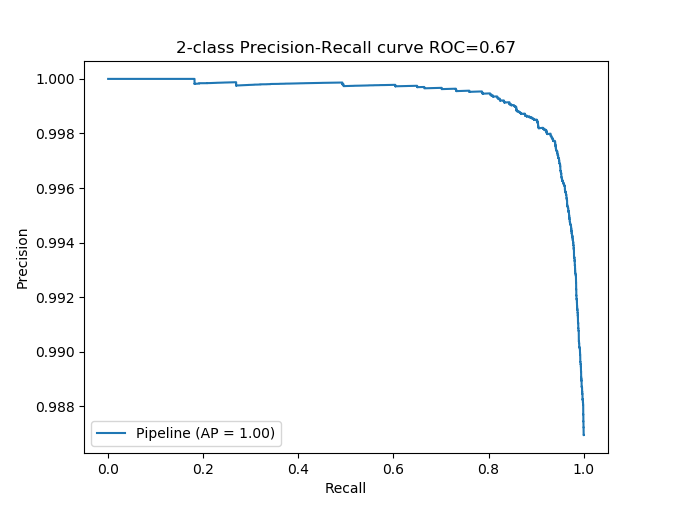

In [18]:
%matplotlib notebook
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

clf = clf_models[('DecisionTreeClassifier', 'LogisticRegression')]
pred = clf.predict(X_test)
roc_auc = roc_auc_score(y_test, pred, average='weighted')

disp = plot_precision_recall_curve(clf, X_test, y_test, sample_weight=y_test)
fig = disp.ax_.set_title('2-class Precision-Recall curve ROC={0:0.2f}'.format(roc_auc))
plt.show()

In [26]:
columns_of_model = [y for x, y in zip(clf_models[('DecisionTreeClassifier', 'LogisticRegression')]['feature_selection'].get_support(), model_columns) if x]
for col in columns_of_model:
    print(f"{col}   {vNames.descriptionOfColumn(col)}")

DiffDress_1718   Children who have difficulty dressing or bathing, age 6-17 years
CSHCNComplex_1718   Complexity of health care needs
MENBEVCOV   Health Insurance - Cover Mental Behavioral Needs
K4Q38   Received Special Services - Currently
ARRANGEHC   Hours Spent Arranging Health Medical Care
ATHOMEHC   Hours Spent Providing Home Health Care
K5Q21   Arrange Or Coordinate Care Extra Help
partic_1718   Number of organized activities child participates in after school (6-17 years)
EMOSUPADV   Emotional Support - Health Condition Support Group
SESPLANYR   Special Education Plan - Age in Years
K4Q26   Specialist Visit - Problem
K5Q11   Need a Referral - Problem
K7Q82_R   Cares About Doing Well in School
C4Q04   Frustrated In Efforts to Get Service
K8Q21   Share Ideas or Talk About Things That Matter
K7Q85_R   Stays Calm and In Control When Challenged
cntdiff   Number of functional difficulties reported from list of 12 different difficulties asked in the survey
ADHDSev_1718   Parent-rated s

**Classification algorithm**: Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier = RandomForestClassifier(max_depth=3, random_state=0, class_weight='balanced')

randomForestClassifier.fit(X_train, y_train)

clf_models[('', 'RandomForestClassifier')] = randomForestClassifier

print(classification_report(y_test, randomForestClassifier.predict(X_test)))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


              precision    recall  f1-score   support

         1.0       0.20      0.94      0.33       404
         2.0       1.00      0.90      0.95     15235

    accuracy                           0.90     15639
   macro avg       0.60      0.92      0.64     15639
weighted avg       0.98      0.90      0.93     15639



<IPython.core.display.Javascript object>


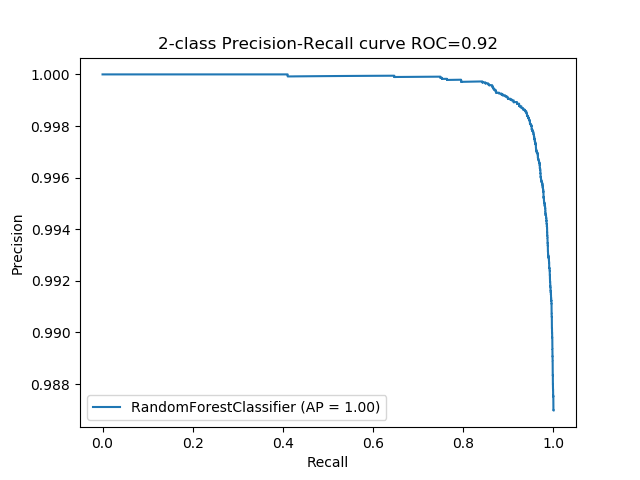

In [21]:
%matplotlib notebook
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

clf = clf_models[('', 'RandomForestClassifier')]
pred = clf.predict(X_test)
roc_auc = roc_auc_score(y_test, pred, average='weighted')

disp = plot_precision_recall_curve(clf, X_test, y_test, sample_weight=y_test)
fig = disp.ax_.set_title('2-class Precision-Recall curve ROC={0:0.2f}'.format(roc_auc))
plt.show()

**Classification algorithm**: Support Vector Machine Classifier

In [22]:
from sklearn import svm

svmClassifier = svm.SVC(random_state=0, class_weight='balanced')

svmClassifier.fit(X_train, y_train)

clf_models[('', 'SVC')] = svmClassifier
print(classification_report(y_test, svmClassifier.predict(X_test)))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.18      0.93      0.30       404
         2.0       1.00      0.89      0.94     15235

    accuracy                           0.89     15639
   macro avg       0.59      0.91      0.62     15639
weighted avg       0.98      0.89      0.92     15639



<IPython.core.display.Javascript object>


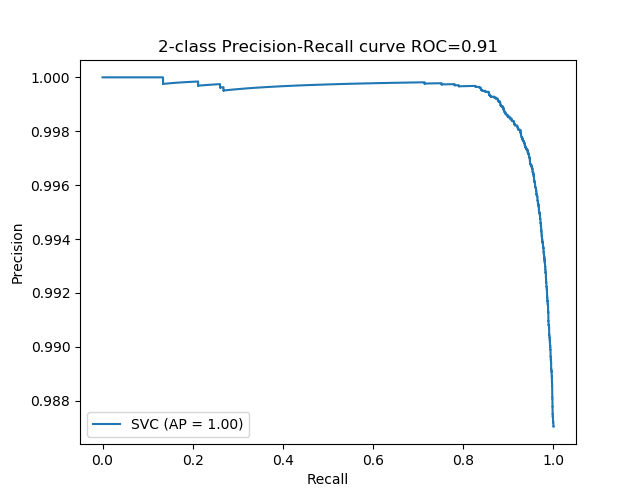

In [23]:
%matplotlib notebook
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

clf = clf_models[('', 'SVC')]
pred = clf.predict(X_test)
roc_auc = roc_auc_score(y_test, pred, average='weighted')

disp = plot_precision_recall_curve(clf, X_test, y_test, sample_weight=y_test)
fig = disp.ax_.set_title('2-class Precision-Recall curve ROC={0:0.2f}'.format(roc_auc))
plt.show()

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# plot_confusion_matrix(svmClassifier, X_test, y_test)
# plt.show()
print(confusion_matrix(y_test, svmClassifier.predict(X_test)))

[[  375    29]
 [ 1745 13490]]
